In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
import cupy as np
import matplotlib.pyplot as plt
from src.data_splitting import train_val_test_split, one_hot_encode
from src.models import plot_loss, NeuralNetwork, linear_schedule, exponential_schedule
from src.metrics import evaluate

X_images = np.load("X_images.npy")
y_images = np.load("y_images.npy")


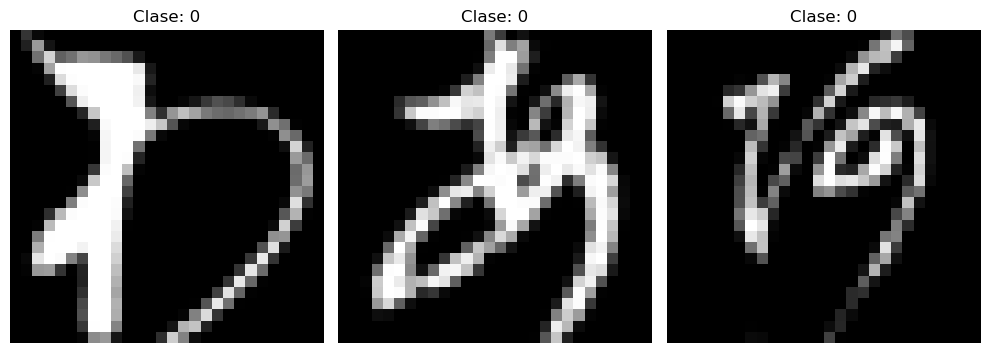

In [56]:
def plot_images(X, y, n=3):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X[i].reshape(28, 28).get(), cmap="gray")
        plt.title(f"Clase: {y[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(X_images, y_images)

X_images = X_images / 255.0

# División
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X_images, y_images)


Epoch 0: Train Loss = 4.0633, Val Loss = 4.0637, LR = 0.010000
Epoch 10: Train Loss = 4.0067, Val Loss = 4.0085, LR = 0.010000
Epoch 20: Train Loss = 3.9656, Val Loss = 3.9686, LR = 0.010000
Epoch 30: Train Loss = 3.9330, Val Loss = 3.9376, LR = 0.010000
Epoch 40: Train Loss = 3.9060, Val Loss = 3.9126, LR = 0.010000
Epoch 50: Train Loss = 3.8831, Val Loss = 3.8911, LR = 0.010000
Epoch 60: Train Loss = 3.8626, Val Loss = 3.8722, LR = 0.010000
Epoch 70: Train Loss = 3.8440, Val Loss = 3.8549, LR = 0.010000
Epoch 80: Train Loss = 3.8267, Val Loss = 3.8390, LR = 0.010000
Epoch 90: Train Loss = 3.8104, Val Loss = 3.8240, LR = 0.010000
Epoch 99: Train Loss = 3.7963, Val Loss = 3.8110, LR = 0.010000


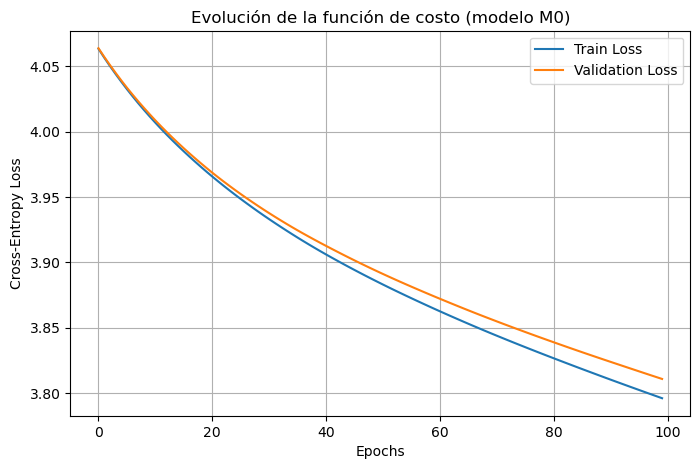

In [57]:
num_classes = len(np.unique(y_train))
y_train_oh = one_hot_encode(y_train, num_classes)
y_val_oh = one_hot_encode(y_val, num_classes)

input_dim = X_train.shape[1]
output_dim = num_classes

model_M0 = NeuralNetwork(layer_sizes=[input_dim, 100, 80, output_dim], learning_rate=0.01)
history = model_M0.train(X_train, y_train_oh, X_val, y_val_oh, epochs=100)

plot_loss(history)

### Resultados en Dataset

| Métrica       |     Valor |
|:--------------|----------:|
| Accuracy      | 0.0605714 |
| Cross-Entropy | 3.79471   |

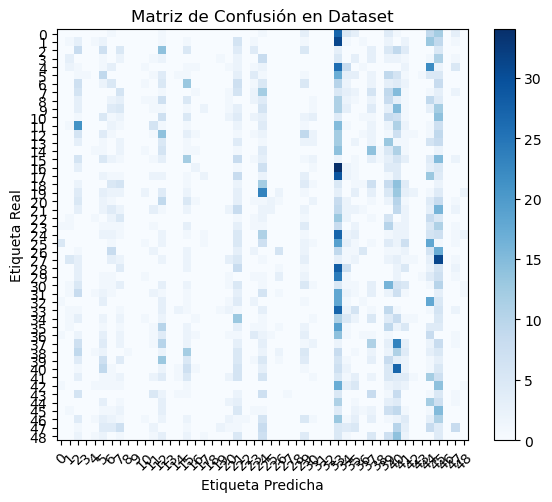

### Resultados en Dataset

| Métrica       |     Valor |
|:--------------|----------:|
| Accuracy      | 0.0466667 |
| Cross-Entropy | 3.81098   |

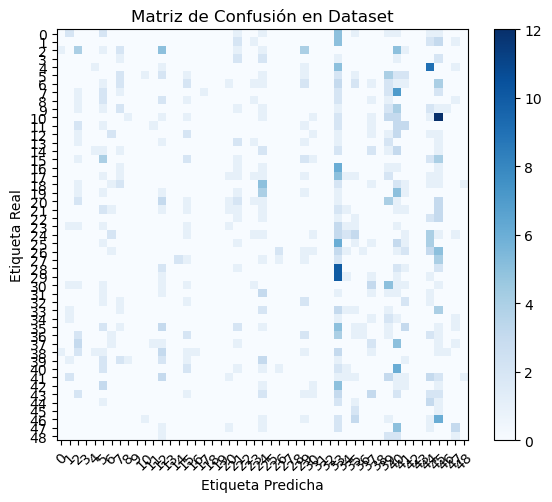

In [58]:
acc_train, loss_train, cm_train = evaluate(model_M0, X_train, y_train_oh)
acc_val, loss_val, cm_val = evaluate(model_M0, X_val, y_val_oh)


### 3 Implementación y Entrenamiento de una Red Neuronal Avanzada

#### Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de #### entrenamiento y la performance del modelo resultante.
##### – Rate scheduling lineal (con saturación) y exponencial.


Epoch 0: Train Loss = 4.0633, Val Loss = 4.0505, LR = 0.030000
Epoch 10: Train Loss = 3.9325, Val Loss = 3.9317, LR = 0.029710
Epoch 20: Train Loss = 3.8632, Val Loss = 3.8691, LR = 0.029420
Epoch 30: Train Loss = 3.8122, Val Loss = 3.8227, LR = 0.029130
Epoch 40: Train Loss = 3.7680, Val Loss = 3.7823, LR = 0.028840
Epoch 50: Train Loss = 3.7258, Val Loss = 3.7443, LR = 0.028550
Epoch 60: Train Loss = 3.6837, Val Loss = 3.7064, LR = 0.028260
Epoch 70: Train Loss = 3.6408, Val Loss = 3.6677, LR = 0.027970
Epoch 80: Train Loss = 3.5968, Val Loss = 3.6272, LR = 0.027680
Epoch 90: Train Loss = 3.5511, Val Loss = 3.5845, LR = 0.027390
Epoch 100: Train Loss = 3.5035, Val Loss = 3.5393, LR = 0.027100
Epoch 110: Train Loss = 3.4538, Val Loss = 3.4920, LR = 0.026810
Epoch 120: Train Loss = 3.4023, Val Loss = 3.4433, LR = 0.026520
Epoch 130: Train Loss = 3.3492, Val Loss = 3.3930, LR = 0.026230
Epoch 140: Train Loss = 3.2948, Val Loss = 3.3414, LR = 0.025940
Epoch 150: Train Loss = 3.2390, Val 

### Resultados en Dataset

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      | 0.628   |
| Cross-Entropy | 1.60308 |

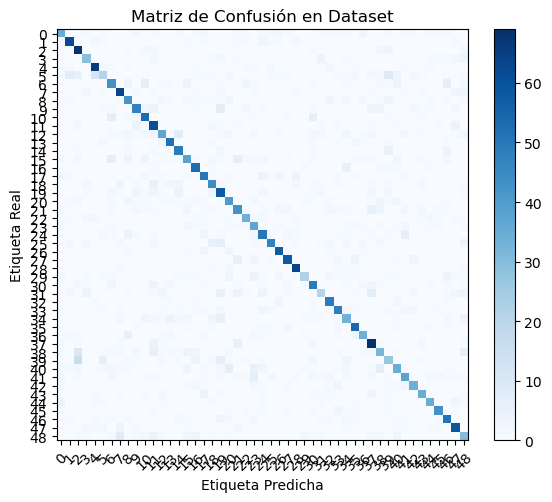

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.526667 |
| Cross-Entropy | 1.89403  |

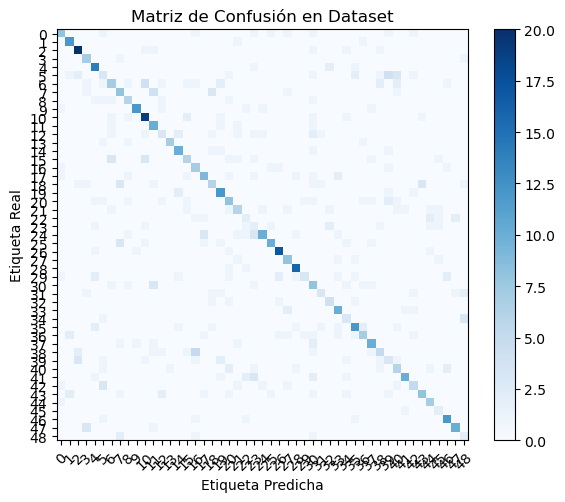

Epoch 0: Train Loss = 4.0633, Val Loss = 4.0505, LR = 0.030000
Epoch 10: Train Loss = 3.9341, Val Loss = 3.9334, LR = 0.028533
Epoch 20: Train Loss = 3.8675, Val Loss = 3.8735, LR = 0.027138
Epoch 30: Train Loss = 3.8202, Val Loss = 3.8305, LR = 0.025812
Epoch 40: Train Loss = 3.7810, Val Loss = 3.7948, LR = 0.024550
Epoch 50: Train Loss = 3.7455, Val Loss = 3.7627, LR = 0.023349
Epoch 60: Train Loss = 3.7120, Val Loss = 3.7327, LR = 0.022208
Epoch 70: Train Loss = 3.6796, Val Loss = 3.7037, LR = 0.021122
Epoch 80: Train Loss = 3.6481, Val Loss = 3.6754, LR = 0.020089
Epoch 90: Train Loss = 3.6175, Val Loss = 3.6476, LR = 0.019107
Epoch 100: Train Loss = 3.5874, Val Loss = 3.6200, LR = 0.018173
Epoch 110: Train Loss = 3.5579, Val Loss = 3.5925, LR = 0.017285
Epoch 120: Train Loss = 3.5288, Val Loss = 3.5652, LR = 0.016440
Epoch 130: Train Loss = 3.5003, Val Loss = 3.5383, LR = 0.015636
Epoch 140: Train Loss = 3.4723, Val Loss = 3.5118, LR = 0.014871
Epoch 150: Train Loss = 3.4449, Val 

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.366571 |
| Cross-Entropy | 2.82671  |

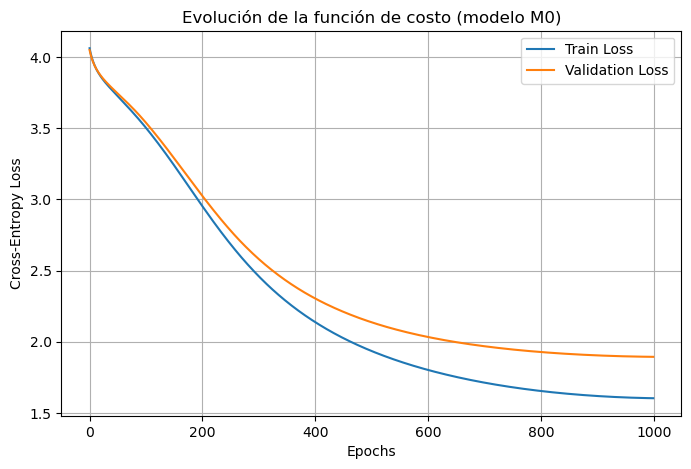

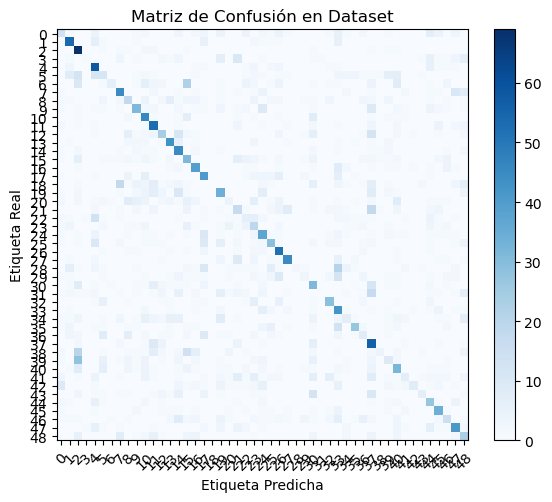

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.322667 |
| Cross-Entropy | 2.91457  |

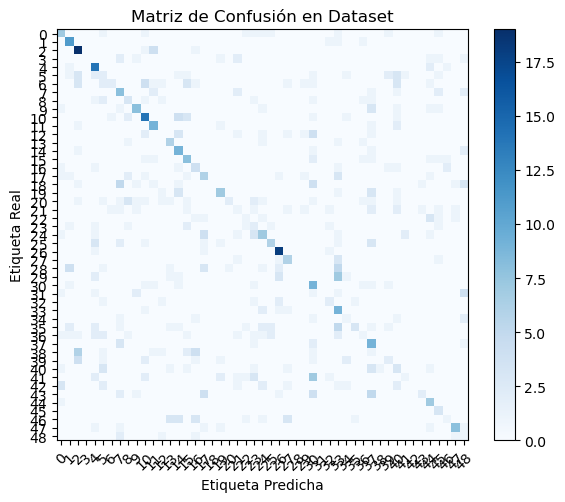

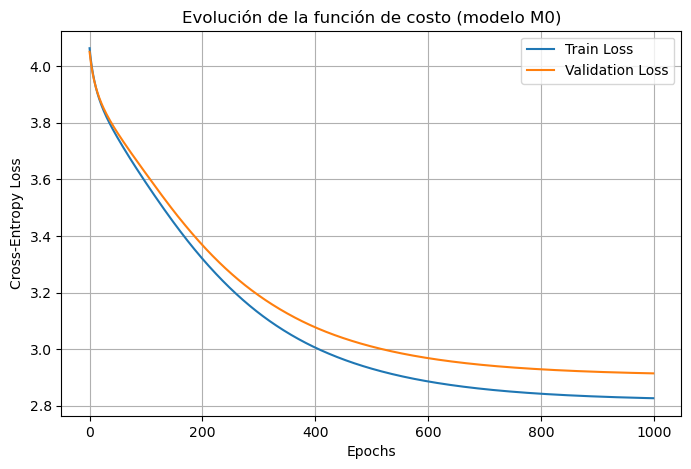

In [66]:
model_M1 = NeuralNetwork(layer_sizes=[input_dim, 100, 80, output_dim], learning_rate=0.03)

#  Lineal con saturación
scheduler = lambda epoch: linear_schedule(epoch, initial_lr=0.03, final_lr=0.001, saturate_epoch=1000)

history = model_M1.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=1000,
    use_scheduler=True,
    scheduler_fn=scheduler
)

acc_train_M1, loss_train_M1, cm_train_M1 = evaluate(model_M1, X_train, y_train_oh)
acc_val_M1, loss_val_M1, cm_val_M1 = evaluate(model_M1, X_val, y_val_oh)
plot_loss(history)

# Crear el modelo
model_exp = NeuralNetwork(layer_sizes=[input_dim, 100, 80, output_dim], learning_rate=0.03)

# Definir el scheduler
scheduler_fn = exponential_schedule(initial_lr=0.03, gamma=0.995)

# Entrenar
history_exp = model_exp.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=1000,
    use_scheduler=True,
    scheduler_fn=scheduler_fn,
    verbose=True
)

# Evaluar el modelo
acc_train_exp, loss_train_exp, cm_train_exp = evaluate(model_exp, X_train, y_train_oh)
acc_val_exp, loss_val_exp, cm_val_exp = evaluate(model_exp, X_val, y_val_oh)
plot_loss(history_exp)

#### – Mini-batch stochastic gradient descent.

Epoch 0: Train Loss = 3.9418, Val Loss = 3.7990, LR = 0.010000
Epoch 10: Train Loss = 2.0081, Val Loss = 2.1259, LR = 0.010000
Epoch 20: Train Loss = 1.3589, Val Loss = 1.7407, LR = 0.010000
Epoch 30: Train Loss = 1.0410, Val Loss = 1.6179, LR = 0.010000
Epoch 40: Train Loss = 0.8166, Val Loss = 1.6098, LR = 0.010000
Epoch 50: Train Loss = 0.6383, Val Loss = 1.6122, LR = 0.010000
Epoch 60: Train Loss = 0.5034, Val Loss = 1.6465, LR = 0.010000
Epoch 70: Train Loss = 0.3914, Val Loss = 1.6596, LR = 0.010000
Epoch 80: Train Loss = 0.2989, Val Loss = 1.7021, LR = 0.010000
Epoch 90: Train Loss = 0.2328, Val Loss = 1.7326, LR = 0.010000
Epoch 100: Train Loss = 0.1815, Val Loss = 1.7891, LR = 0.010000
Epoch 110: Train Loss = 0.1428, Val Loss = 1.8407, LR = 0.010000
Epoch 120: Train Loss = 0.1146, Val Loss = 1.9023, LR = 0.010000
Epoch 130: Train Loss = 0.0934, Val Loss = 1.9442, LR = 0.010000
Epoch 140: Train Loss = 0.0774, Val Loss = 1.9825, LR = 0.010000
Epoch 150: Train Loss = 0.0651, Val 

### Resultados en Dataset

| Métrica       |     Valor |
|:--------------|----------:|
| Accuracy      | 1         |
| Cross-Entropy | 0.0312026 |

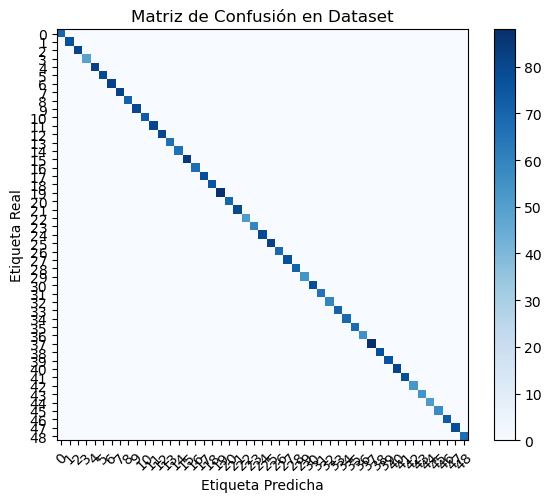

### Resultados en Dataset

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      | 0.616   |
| Cross-Entropy | 2.18597 |

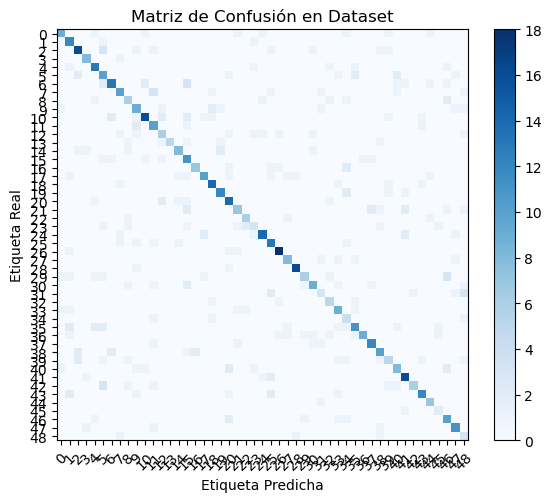

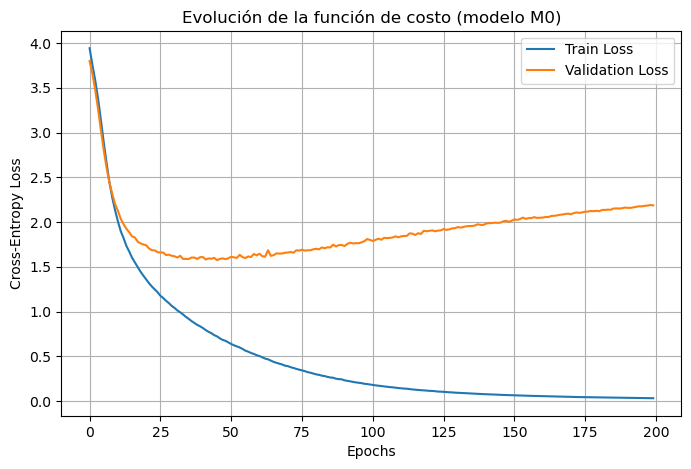

In [60]:
# Entrenamiento con Mini-Batch SGD
model_mini_batch = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.01
)

history_mini_batch = model_mini_batch.train(
    X_train,
    y_train_oh,
    X_val,
    y_val_oh,
    epochs=200,
    batch_size=32,             # ← importante: elegí el tamaño del mini-batch
    verbose=True
)

evaluate(model_mini_batch, X_train, y_train_oh)
evaluate(model_mini_batch, X_val, y_val_oh)

plot_loss(history_mini_batch)


#### – Optimizador ADAM.

Epoch 0: Train Loss = 4.0633, Val Loss = 3.9515, LR = 0.001000
Epoch 10: Train Loss = 3.4020, Val Loss = 3.3999, LR = 0.001000
Epoch 20: Train Loss = 2.6869, Val Loss = 2.7531, LR = 0.001000
Epoch 30: Train Loss = 2.0570, Val Loss = 2.2282, LR = 0.001000
Epoch 40: Train Loss = 1.6209, Val Loss = 1.9250, LR = 0.001000
Epoch 50: Train Loss = 1.3058, Val Loss = 1.7510, LR = 0.001000
Epoch 60: Train Loss = 1.0705, Val Loss = 1.6652, LR = 0.001000
Epoch 70: Train Loss = 0.8843, Val Loss = 1.6132, LR = 0.001000
Epoch 80: Train Loss = 0.7325, Val Loss = 1.5817, LR = 0.001000
Epoch 90: Train Loss = 0.6045, Val Loss = 1.5765, LR = 0.001000
Epoch 99: Train Loss = 0.5058, Val Loss = 1.5862, LR = 0.001000


### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.901143 |
| Cross-Entropy | 0.495729 |

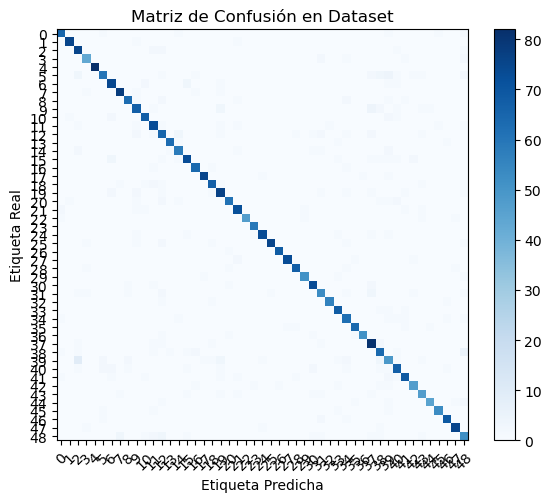

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.613333 |
| Cross-Entropy | 1.58622  |

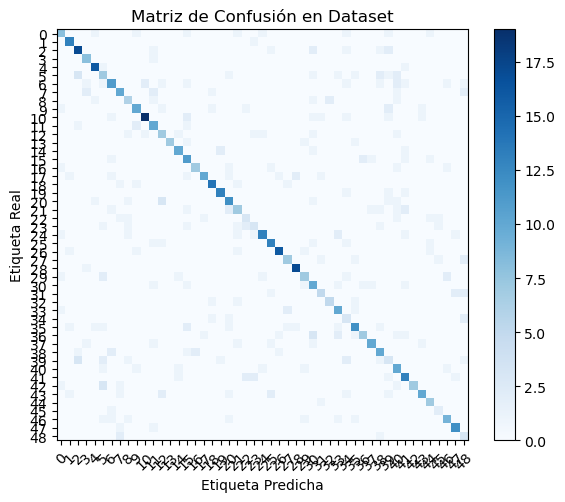

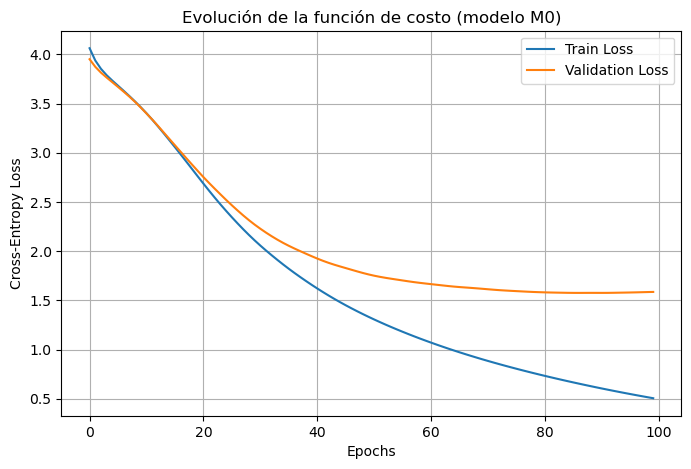

In [61]:
model_adam = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.001,
    use_adam=True
)

history_adam = model_adam.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=100,
    verbose=True
)

evaluate(model_adam, X_train, y_train_oh)
evaluate(model_adam, X_val, y_val_oh)

plot_loss(history_adam)

#### – Regularización L2.

Epoch 0: Train Loss = 4.0633, Val Loss = 4.0637, LR = 0.010000
Epoch 10: Train Loss = 4.0068, Val Loss = 4.0085, LR = 0.010000
Epoch 20: Train Loss = 3.9657, Val Loss = 3.9686, LR = 0.010000
Epoch 30: Train Loss = 3.9331, Val Loss = 3.9376, LR = 0.010000
Epoch 40: Train Loss = 3.9061, Val Loss = 3.9126, LR = 0.010000
Epoch 50: Train Loss = 3.8831, Val Loss = 3.8911, LR = 0.010000
Epoch 60: Train Loss = 3.8627, Val Loss = 3.8722, LR = 0.010000
Epoch 70: Train Loss = 3.8440, Val Loss = 3.8549, LR = 0.010000
Epoch 80: Train Loss = 3.8268, Val Loss = 3.8390, LR = 0.010000
Epoch 90: Train Loss = 3.8104, Val Loss = 3.8240, LR = 0.010000
Epoch 100: Train Loss = 3.7948, Val Loss = 3.8096, LR = 0.010000
Epoch 110: Train Loss = 3.7796, Val Loss = 3.7956, LR = 0.010000
Epoch 120: Train Loss = 3.7647, Val Loss = 3.7818, LR = 0.010000
Epoch 130: Train Loss = 3.7499, Val Loss = 3.7684, LR = 0.010000
Epoch 140: Train Loss = 3.7351, Val Loss = 3.7551, LR = 0.010000
Epoch 150: Train Loss = 3.7203, Val 

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.525429 |
| Cross-Entropy | 2.09389  |

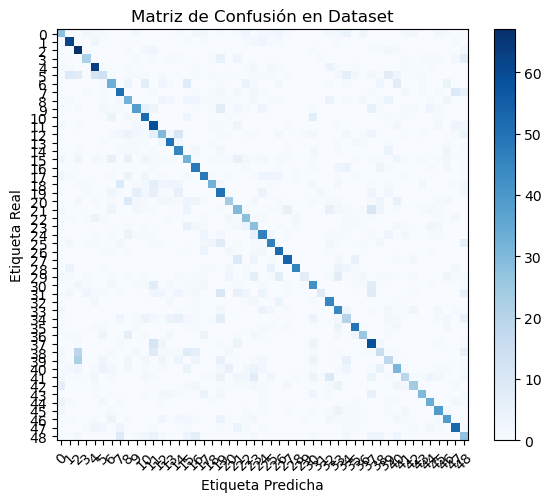

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.454667 |
| Cross-Entropy | 2.26911  |

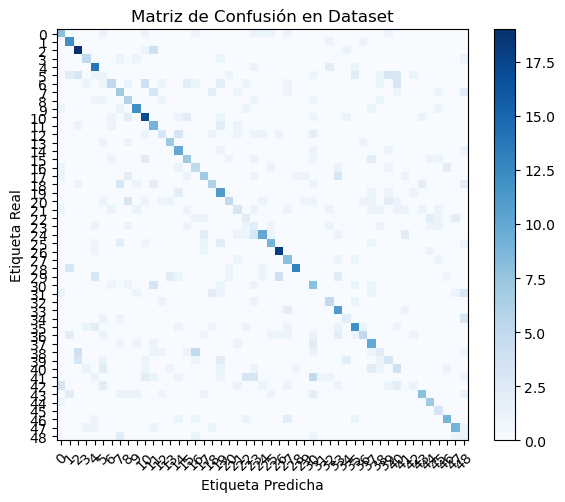

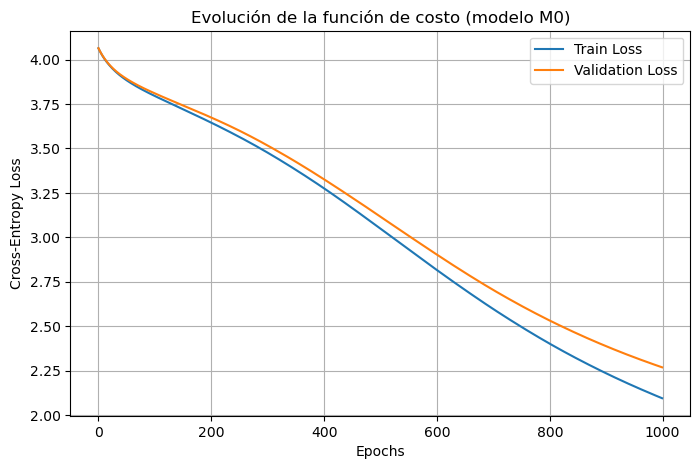

In [62]:
model_l2 = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.01,
    l2_lambda=0.001
)

history_l2 = model_l2.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=1000
)
evaluate(model_l2, X_train, y_train_oh)
evaluate(model_l2, X_val, y_val_oh)

plot_loss(history_l2)

#### – Regularización mediante early stopping

Epoch 0: Train Loss = 4.0633, Val Loss = 4.0637, LR = 0.010000
Epoch 10: Train Loss = 4.0067, Val Loss = 4.0085, LR = 0.010000
Epoch 20: Train Loss = 3.9656, Val Loss = 3.9686, LR = 0.010000
Epoch 30: Train Loss = 3.9330, Val Loss = 3.9376, LR = 0.010000
Epoch 40: Train Loss = 3.9060, Val Loss = 3.9126, LR = 0.010000
Epoch 50: Train Loss = 3.8831, Val Loss = 3.8911, LR = 0.010000
Epoch 60: Train Loss = 3.8626, Val Loss = 3.8722, LR = 0.010000
Epoch 70: Train Loss = 3.8440, Val Loss = 3.8549, LR = 0.010000
Epoch 80: Train Loss = 3.8267, Val Loss = 3.8390, LR = 0.010000
Epoch 90: Train Loss = 3.8104, Val Loss = 3.8240, LR = 0.010000
Epoch 100: Train Loss = 3.7947, Val Loss = 3.8096, LR = 0.010000
Epoch 110: Train Loss = 3.7795, Val Loss = 3.7956, LR = 0.010000
Epoch 120: Train Loss = 3.7646, Val Loss = 3.7818, LR = 0.010000
Epoch 130: Train Loss = 3.7498, Val Loss = 3.7684, LR = 0.010000
Epoch 140: Train Loss = 3.7350, Val Loss = 3.7551, LR = 0.010000
Epoch 150: Train Loss = 3.7203, Val 

### Resultados en Dataset

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      |  0.676  |
| Cross-Entropy |  1.3738 |

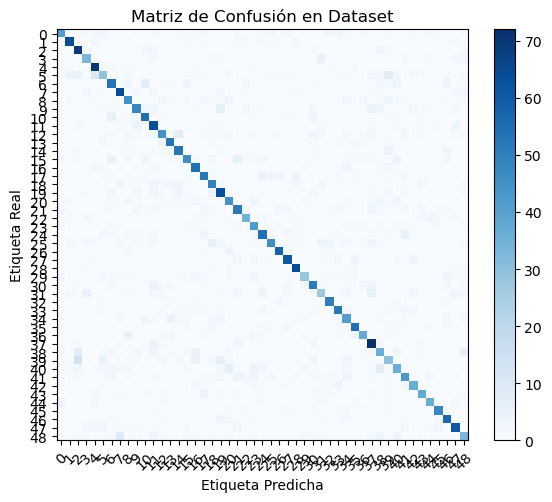

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.562667 |
| Cross-Entropy | 1.75646  |

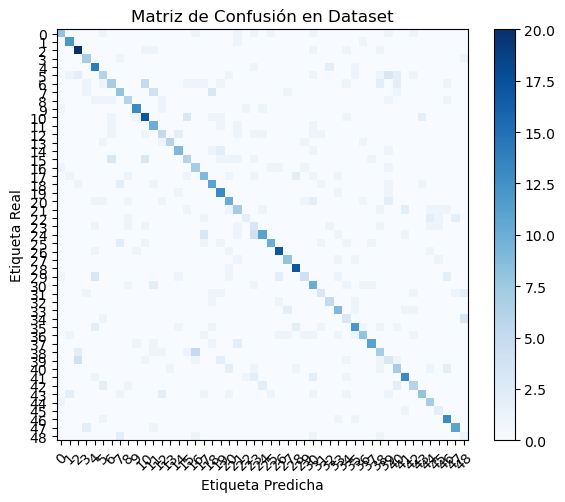

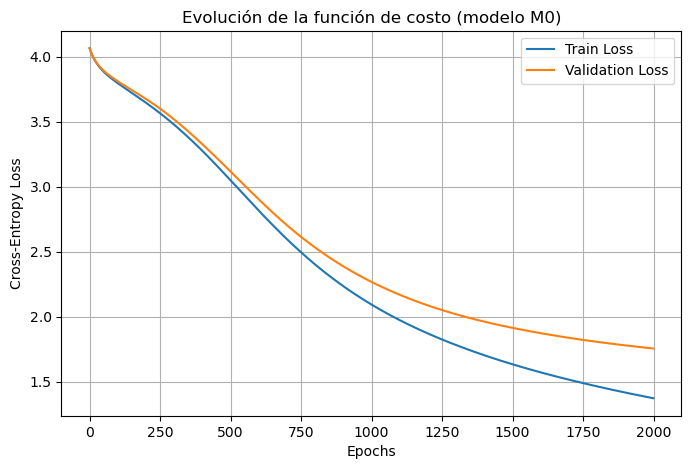

In [63]:
model_early = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.01
)

history_early = model_early.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=2000,
    early_stopping=True,
    patience=15,      # Se detiene si no mejora en 15 épocas
    min_delta=1e-4,   # Considera que mejora solo si mejora al menos esto
    verbose=True
)

evaluate(model_early, X_train, y_train_oh)
evaluate(model_early, X_val, y_val_oh)

plot_loss(history_early)

#### Regularización mediante dropout

Epoch 0: Train Loss = 4.2556, Val Loss = 4.2390, LR = 0.010000
Epoch 10: Train Loss = 4.1473, Val Loss = 4.1450, LR = 0.010000
Epoch 20: Train Loss = 4.0629, Val Loss = 4.0722, LR = 0.010000
Epoch 30: Train Loss = 4.0366, Val Loss = 4.0479, LR = 0.010000
Epoch 40: Train Loss = 4.0103, Val Loss = 3.9786, LR = 0.010000
Epoch 50: Train Loss = 3.9674, Val Loss = 3.9869, LR = 0.010000
Epoch 60: Train Loss = 3.9495, Val Loss = 3.9557, LR = 0.010000
Epoch 70: Train Loss = 3.9290, Val Loss = 3.9423, LR = 0.010000
Epoch 80: Train Loss = 3.9339, Val Loss = 3.9297, LR = 0.010000
Epoch 90: Train Loss = 3.9113, Val Loss = 3.9323, LR = 0.010000
Epoch 100: Train Loss = 3.8932, Val Loss = 3.9201, LR = 0.010000
Epoch 110: Train Loss = 3.8908, Val Loss = 3.8826, LR = 0.010000
Epoch 120: Train Loss = 3.8815, Val Loss = 3.8871, LR = 0.010000
Epoch 130: Train Loss = 3.8690, Val Loss = 3.8748, LR = 0.010000
Epoch 140: Train Loss = 3.8750, Val Loss = 3.8903, LR = 0.010000
Epoch 150: Train Loss = 3.8463, Val 

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.196857 |
| Cross-Entropy | 3.23187  |

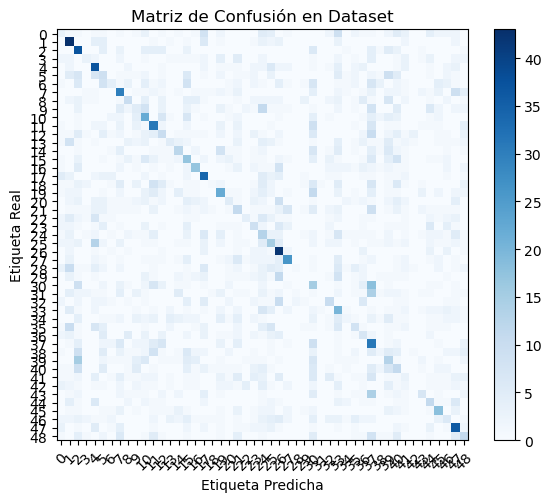

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.181333 |
| Cross-Entropy | 3.33878  |

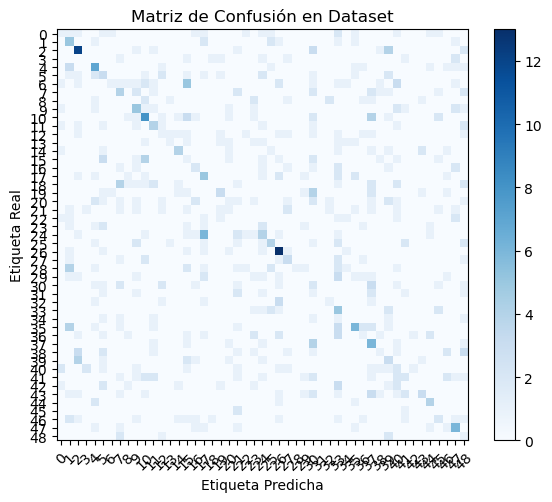

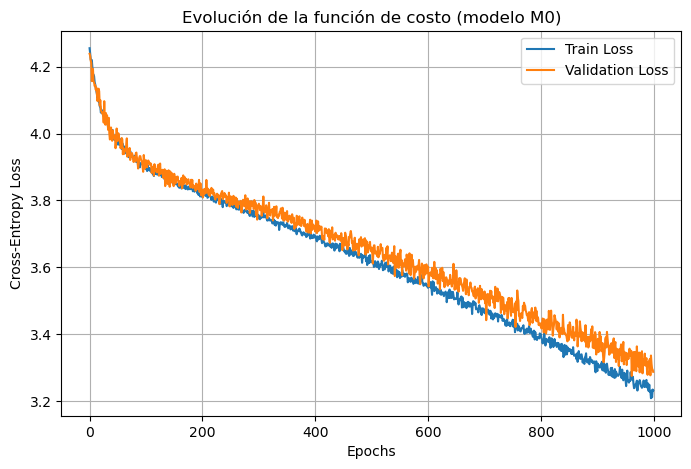

In [64]:
model_dropout = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.01,
    dropout_rate=0.3  # 30% de neuronas apagadas durante entrenamiento
)

history_dropout = model_dropout.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=1000,
)

evaluate(model_dropout, X_train, y_train_oh)
evaluate(model_dropout, X_val, y_val_oh)

plot_loss(history_dropout)


#### - Batch normalization

Explorar cambios en la arquitectura de la red (es decir, la cantidad de capas ocultas y unidades ocultas por capa), y los hiperparámetros (cada uno de los items en la lista anterior tiene una serie de parámetros que podemos variar), y determinar la configuración que funcione mejor (menor error de validación). Llamaremos a este modelo M1.

In [ ]:
layers = [X_train.shape[1], 128, 64, 32, num_classes]

from src.utils import grid_search_model_M1

# model = NeuralNetwork(
#     layer_sizes=layers,
#     learning_rate=0.01,
#     l2_lambda=1e-3,
#     dropout_rate=0.2,
#     use_batchnorm=True,
#     use_adam=True,
# )

# scheduler = lambda epoch: linear_schedule(epoch, initial_lr=0.01, final_lr=0.001, saturate_epoch=50)

# history = model.train(
#     X_train, y_train,
#     X_val, y_val,
#     epochs=200,
#     batch_size=32,
#     use_scheduler=True,
#     scheduler_fn=scheduler,
#     early_stopping=True,
#     patience=15,
#     min_delta=1e-4
# )



param_grid = {
    "hidden_layers": [
        [32], [64], [128],            # redes chicas
        [64, 32], [128, 64], [256, 128],  # medianas
        [128, 128, 64], [256, 128, 64], [512, 256, 128],  # profundas
        [64, 64, 64], [128, 128, 128], [256, 256, 256]    # simétricas profundas
    ],
    "lr": [0.001, 0.01, 0.05, 0.1], 
    "lambda_reg": [0.001, 0.01],
    "dropout": [0.1, 0.2],
    "scheduler": ["linear", "exponential"],
    "use_adam": [True],
    "batch_size": [16, 32, 64, 128, 256]     # incluí valores más chicos y más grandes
}


best_config, best_history = grid_search_model_M1(param_grid, X_train, y_train_oh, X_val, y_val_oh)





🔍 Probing 4320 configurations...

🔧 Running config 1/4320: {'hidden_layers': [32], 'lr': 0.001, 'lambda_reg': 0.0, 'dropout': 0.0, 'scheduler': 'linear', 'use_adam': True, 'batch_size': 16}


KeyboardInterrupt: 

Epoch 0: Train Loss = 2.7059, Val Loss = 2.5936, LR = 0.300000
Epoch 10: Train Loss = 0.1387, Val Loss = 1.6445, LR = 0.271000
Epoch 20: Train Loss = 0.0379, Val Loss = 1.6935, LR = 0.242000
Epoch 30: Train Loss = 0.0289, Val Loss = 1.6979, LR = 0.213000
Epoch 40: Train Loss = 0.0260, Val Loss = 1.6722, LR = 0.184000
Epoch 50: Train Loss = 0.0249, Val Loss = 1.6669, LR = 0.155000
Epoch 60: Train Loss = 0.0243, Val Loss = 1.6525, LR = 0.126000
Epoch 70: Train Loss = 0.0238, Val Loss = 1.6411, LR = 0.097000
Epoch 80: Train Loss = 0.0235, Val Loss = 1.6328, LR = 0.068000
Epoch 90: Train Loss = 0.0233, Val Loss = 1.6313, LR = 0.039000
Epoch 99: Train Loss = 0.0230, Val Loss = 1.6297, LR = 0.012900


### Resultados en Dataset

| Métrica       |     Valor |
|:--------------|----------:|
| Accuracy      | 1         |
| Cross-Entropy | 0.0226485 |

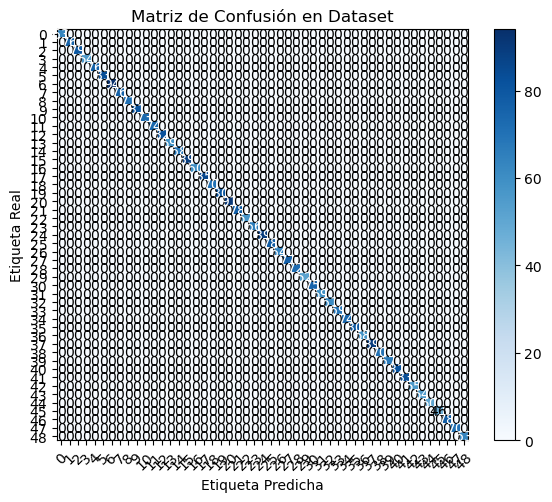

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.654667 |
| Cross-Entropy | 1.62967  |

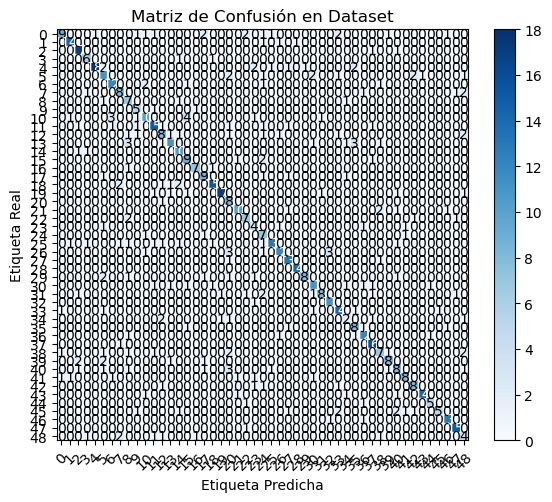

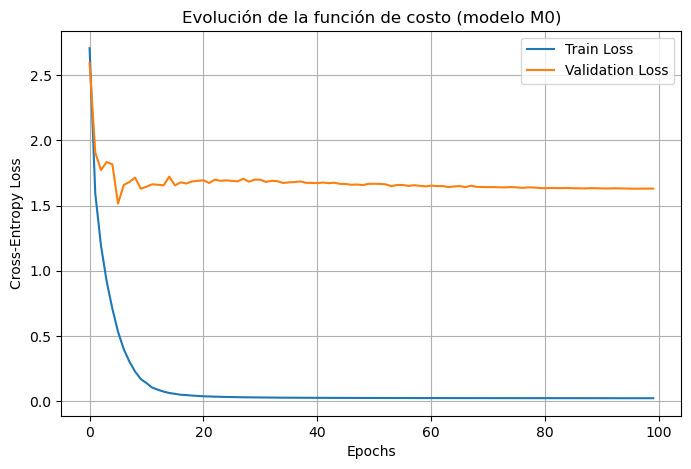

In [ ]:
linear_scheduler = lambda epoch: linear_schedule(epoch,initial_lr=0.3,final_lr=0.01, saturate_epoch=100)
model_M1 = NeuralNetwork(
    layer_sizes=[input_dim,128, output_dim],
    learning_rate=0.3,
    l2_lambda=0.01,
    dropout_rate=0.0,
    use_adam=False,
)

history_M1 = model_M1.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=100,
    batch_size=32,
    use_scheduler=True,
    scheduler_fn=linear_scheduler,
    early_stopping=False,
    patience=10,
    min_delta=1e-2
)

evaluate(model_M1, X_train, y_train_oh)
evaluate(model_M1, X_val, y_val_oh)

plot_loss(history_M1)


### 4. Desarrollo de una Red Neuronal con PyTorch

Utilizando PyTorch, entrenar una red neuronal con la arquitectura y los hiperparámetros hallados en el ejercicio anterior. Llmaremos a este modelo M2.

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [51]:
class M2Net(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size, dropout=0.0, use_batchnorm=False):
        super(M2Net, self).__init__()
        layers = []
        in_features = input_size

        for hidden_units in hidden_layers:
            layers.append(nn.Linear(in_features, hidden_units))
            if use_batchnorm:
                layers.append(nn.BatchNorm1d(hidden_units))
            layers.append(nn.ReLU())
            if dropout > 0.0:
                layers.append(nn.Dropout(dropout))
            in_features = hidden_units

        layers.append(nn.Linear(in_features, output_size))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


from torch.utils.data import TensorDataset, DataLoader

def train_model_M2(X_train, y_train, X_val, y_val, hidden_layers, lr=0.01, batch_size=64,
                   dropout=0.0, use_batchnorm=False, weight_decay=0.0, scheduler_type=None,
                   use_adam=True, epochs=100, patience=10):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Preparar datasets
    train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                             torch.tensor(y_train, dtype=torch.float32))
    val_ds = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                           torch.tensor(y_val, dtype=torch.float32))

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size)

    model = M2Net(X_train.shape[1], hidden_layers, y_train.shape[1],
                  dropout=dropout, use_batchnorm=use_batchnorm).to(device)

    criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay) if use_adam \
        else torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

    if scheduler_type == "linear":
        scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.01, total_iters=epochs)
    elif scheduler_type == "exponential":
        scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    else:
        scheduler = None

    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb.argmax(dim=1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validación
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb)
                loss = criterion(preds, yb.argmax(dim=1))
                val_loss += loss.item()
        val_loss /= len(val_loader)

        print(f"Epoch {epoch+1} - Val Loss: {val_loss:.4f}")

        # Early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("⏹ Early stopping triggered.")
                break

        if scheduler:
            scheduler.step()

    # Cargar mejor modelo
    model.load_state_dict(best_model_state)
    return model


C:\Users\mmatt\AppData\Local\Temp\ipykernel_26320\4276036684.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
C:\Users\mmatt\AppData\Local\Temp\ipykernel_26320\4276036684.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ds = TensorDataset(torch.tensor(X_val, dtype=torch.float32),


Epoch 1 - Val Loss: 2.4781
Epoch 2 - Val Loss: 2.2936
Epoch 3 - Val Loss: 1.9159
Epoch 4 - Val Loss: 1.9828
Epoch 5 - Val Loss: 2.0017
Epoch 6 - Val Loss: 2.0250
Epoch 7 - Val Loss: 1.7813
Epoch 8 - Val Loss: 2.1503
Epoch 9 - Val Loss: 1.7751
Epoch 10 - Val Loss: 1.6992
Epoch 11 - Val Loss: 1.7089
Epoch 12 - Val Loss: 1.9025
Epoch 13 - Val Loss: 1.7726
Epoch 14 - Val Loss: 1.9209
Epoch 15 - Val Loss: 1.6493
Epoch 16 - Val Loss: 1.6746
Epoch 17 - Val Loss: 1.6861
Epoch 18 - Val Loss: 1.8108
Epoch 19 - Val Loss: 1.6477
Epoch 20 - Val Loss: 1.6635
Epoch 21 - Val Loss: 1.7557
Epoch 22 - Val Loss: 1.7632
Epoch 23 - Val Loss: 1.6074
Epoch 24 - Val Loss: 1.7637
Epoch 25 - Val Loss: 1.8009
Epoch 26 - Val Loss: 1.6689
Epoch 27 - Val Loss: 1.6539
Epoch 28 - Val Loss: 1.7904
Epoch 29 - Val Loss: 1.5868
Epoch 30 - Val Loss: 1.6135
Epoch 31 - Val Loss: 1.5665
Epoch 32 - Val Loss: 1.5922
Epoch 33 - Val Loss: 1.5709
Epoch 34 - Val Loss: 1.5590
Epoch 35 - Val Loss: 1.5082
Epoch 36 - Val Loss: 1.5921
E

### Resultados en Dataset

| Métrica       |     Valor |
|:--------------|----------:|
| Accuracy      | 0.798     |
| Cross-Entropy | 0.0526394 |

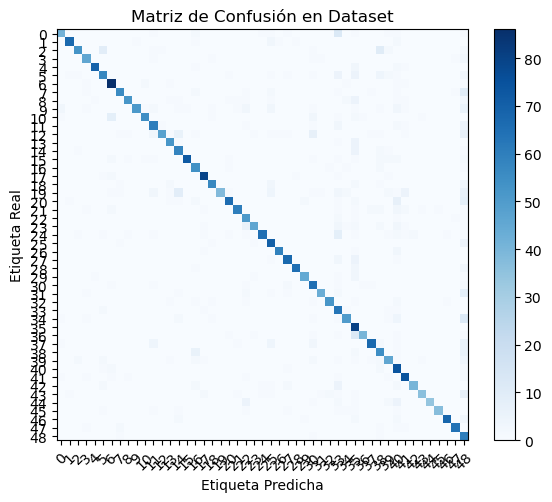

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.608    |
| Cross-Entropy | 0.558664 |

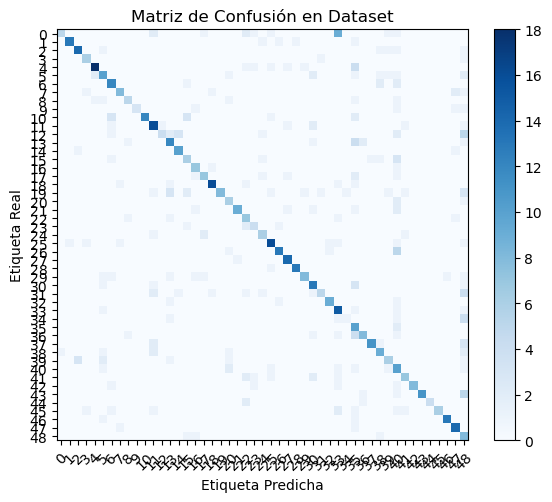

(0.608,
 0.5586639267752568,
 array([[ 5,  0,  0, ...,  0,  0,  0],
        [ 0, 13,  0, ...,  0,  0,  0],
        [ 0,  0, 14, ...,  0,  0,  1],
        ...,
        [ 0,  0,  0, ..., 13,  0,  0],
        [ 0,  0,  0, ...,  0, 14,  0],
        [ 0,  0,  0, ...,  0,  0,  8]]))

In [64]:
best_config = {
    "hidden_layers": [128],
    "lr": 0.3,
    "lambda_reg": 0.01,
    "dropout": 0.0,
    "scheduler": "linear",
    "use_adam": False,
    "batch_size": 32
}

model_M2 = train_model_M2(
    X_train, y_train_oh, X_val, y_val_oh,
    hidden_layers=best_config["hidden_layers"],
    lr=best_config["lr"],
    batch_size=best_config["batch_size"],
    dropout=best_config["dropout"],
    weight_decay=best_config["lambda_reg"],
    scheduler_type=best_config["scheduler"],
    use_adam=best_config["use_adam"],
    epochs=100,
    patience=10
)

if isinstance(X_train, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32)
if isinstance(y_train, np.ndarray):
    y_train = torch.tensor(y_train, dtype=torch.float32)
if isinstance(X_val, np.ndarray):
    X_val = torch.tensor(X_val, dtype=torch.float32)
if isinstance(y_val, np.ndarray):
    y_val = torch.tensor(y_val, dtype=torch.float32)
evaluate(model_M2, X_train, y_train_oh)
evaluate(model_M2, X_val, y_val_oh)


Utilizando PyTorch, explorar cambios en la cantidad de capas ocultas y unidades ocultas por capa, y determinar la configuración que funcione mejor. LLamaremos a este modelo M3

In [72]:
class M3Net(nn.Module):
    def __init__(self, input_dim, hidden_units, output_dim, activation=nn.ReLU()):
        """
        Parámetros:
        - input_dim (int): dimensión de entrada
        - hidden_units (list of int): número de unidades por capa oculta
        - output_dim (int): número de clases
        - activation (nn.Module): función de activación (por default ReLU)
        """
        super(M3Net, self).__init__()
        self.activation = activation

        layers = []
        prev_dim = input_dim
        for hidden_dim in hidden_units:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(self.activation)
            prev_dim = hidden_dim
        layers.append(nn.Linear(prev_dim, output_dim))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
    
def train_M3_model(X_train, y_train_oh, X_val, y_val_oh,
                   hidden_layers,
                   lr=1e-3,
                   batch_size=32,
                   epochs=100,
                   verbose=True):

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Convertir a tensores
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_oh, dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val_oh, dtype=torch.float32)

        # Crear datasets y dataloaders
        train_ds = TensorDataset(X_train_tensor, y_train_tensor)
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

        # Crear modelo
        input_dim = X_train.shape[1]
        output_dim = y_train_oh.shape[1]
        model = M3Net(input_dim, hidden_layers, output_dim).to(device)

        # Configurar optimizador y función de pérdida
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        history = {"train_loss": [], "val_loss": []}

        for epoch in range(epochs):
            model.train()
            total_loss = 0

            for xb, yb in train_dl:
                xb, yb = xb.to(device), yb.to(device)
                optimizer.zero_grad()
                preds = model(xb)
                loss = criterion(preds, torch.argmax(yb, dim=1))
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            avg_train_loss = total_loss / len(train_dl)
            history["train_loss"].append(avg_train_loss)

            # Validación
            model.eval()
            with torch.no_grad():
                val_preds = model(X_val_tensor.to(device))
                val_loss = criterion(val_preds, torch.argmax(y_val_tensor.to(device), dim=1)).item()
                history["val_loss"].append(val_loss)

            if verbose and (epoch % 10 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:3d} - Train Loss: {avg_train_loss:.4f} - Val Loss: {val_loss:.4f}")

        return model, history



C:\Users\mmatt\AppData\Local\Temp\ipykernel_26320\851747134.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
C:\Users\mmatt\AppData\Local\Temp\ipykernel_26320\851747134.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train_oh, dtype=torch.float32)
C:\Users\mmatt\AppData\Local\Temp\ipykernel_26320\851747134.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
C:\Users\mmatt\AppData\Loc

Epoch   0 - Train Loss: 3.4296 - Val Loss: 2.8206
Epoch  10 - Train Loss: 0.6285 - Val Loss: 1.6242
Epoch  20 - Train Loss: 0.1330 - Val Loss: 2.0058
Epoch  30 - Train Loss: 0.0255 - Val Loss: 2.3866
Epoch  40 - Train Loss: 0.0070 - Val Loss: 2.7039
Epoch  50 - Train Loss: 0.0113 - Val Loss: 2.7401
Epoch  60 - Train Loss: 0.0021 - Val Loss: 2.9823
Epoch  70 - Train Loss: 0.0012 - Val Loss: 3.1371
Epoch  80 - Train Loss: 0.0007 - Val Loss: 3.2898
Epoch  90 - Train Loss: 0.0004 - Val Loss: 3.4372
Epoch  99 - Train Loss: 0.0002 - Val Loss: 3.5750


### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.613333 |
| Cross-Entropy | 7.76021  |

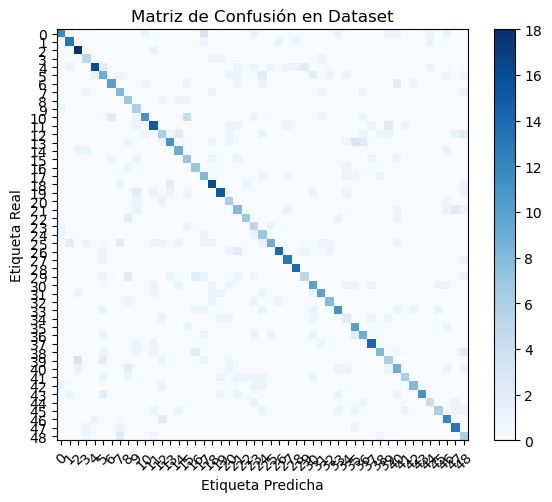

(0.6133333333333333,
 7.7602105,
 array([[12,  1,  0, ...,  1,  0,  0],
        [ 0, 13,  0, ...,  0,  0,  0],
        [ 0,  0, 18, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 12,  0,  0],
        [ 0,  0,  0, ...,  0, 13,  0],
        [ 0,  0,  0, ...,  0,  0,  6]]))

In [73]:
# Probar arquitectura de 2 capas ocultas
hidden_layers = [128, 64]

model_m3, history_m3 = train_M3_model(
    X_train, y_train_oh,
    X_val, y_val_oh,
    hidden_layers=hidden_layers,
    lr=1e-3,
    epochs=100
)

# Evaluar usando tus funciones de métricas
evaluate(model_m3, X_val, y_val_oh)




Utilizando PyTorch, encontrar una arquitectura (capas ocultas y unidades por capa) que produzca overfitting. Llamaremos a este modelo M4.

C:\Users\mmatt\AppData\Local\Temp\ipykernel_26320\851747134.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
C:\Users\mmatt\AppData\Local\Temp\ipykernel_26320\851747134.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train_oh, dtype=torch.float32)
C:\Users\mmatt\AppData\Local\Temp\ipykernel_26320\851747134.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
C:\Users\mmatt\AppData\Loc

Epoch   0 - Train Loss: 3.5759 - Val Loss: 3.0278
Epoch  10 - Train Loss: 0.3733 - Val Loss: 2.0065
Epoch  20 - Train Loss: 0.1262 - Val Loss: 2.9949
Epoch  30 - Train Loss: 0.0011 - Val Loss: 3.4517
Epoch  40 - Train Loss: 0.0005 - Val Loss: 3.7746
Epoch  50 - Train Loss: 0.0003 - Val Loss: 3.9878
Epoch  60 - Train Loss: 0.0002 - Val Loss: 4.1566
Epoch  70 - Train Loss: 0.0001 - Val Loss: 4.3053
Epoch  80 - Train Loss: 0.0001 - Val Loss: 4.4369
Epoch  90 - Train Loss: 0.0001 - Val Loss: 4.5607
Epoch 100 - Train Loss: 0.0000 - Val Loss: 4.6830
Epoch 110 - Train Loss: 0.0000 - Val Loss: 4.7988
Epoch 120 - Train Loss: 0.0000 - Val Loss: 4.9207
Epoch 130 - Train Loss: 0.0000 - Val Loss: 5.0326
Epoch 140 - Train Loss: 0.0000 - Val Loss: 5.1451
Epoch 150 - Train Loss: 0.0000 - Val Loss: 5.2558
Epoch 160 - Train Loss: 0.0000 - Val Loss: 5.3678
Epoch 170 - Train Loss: 0.0000 - Val Loss: 5.4810
Epoch 180 - Train Loss: 0.0000 - Val Loss: 5.5984
Epoch 190 - Train Loss: 0.0000 - Val Loss: 5.7056


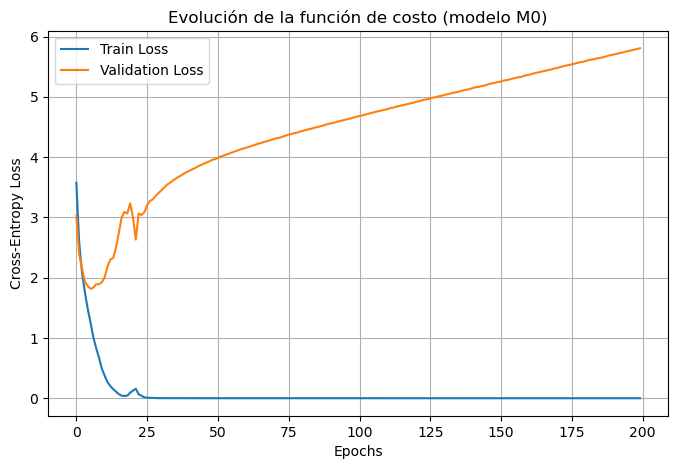

### Resultados en Dataset

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      |       1 |
| Cross-Entropy |      -0 |

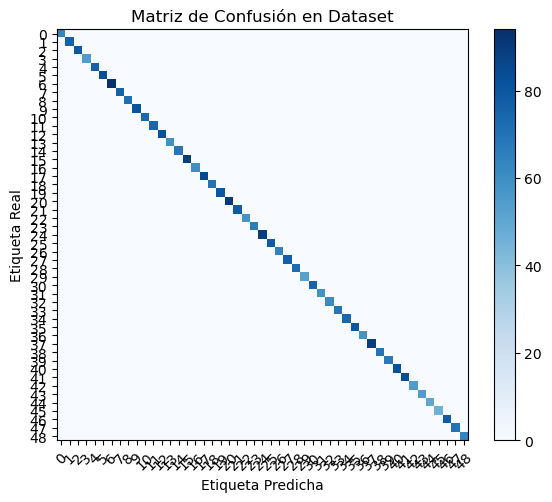

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.606667 |
| Cross-Entropy | 4.72637  |

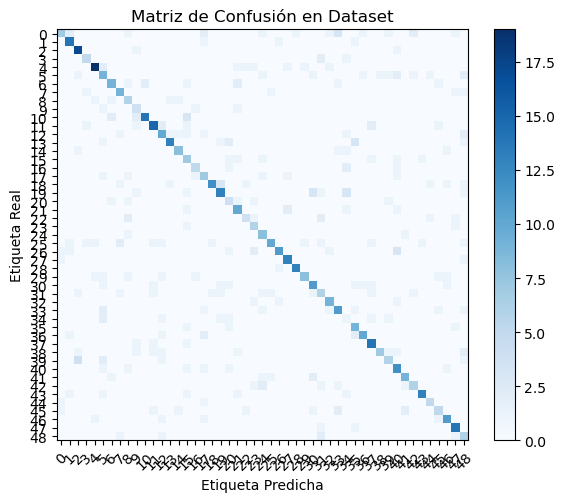

(0.6066666666666667,
 4.7263675,
 array([[ 7,  2,  0, ...,  0,  1,  0],
        [ 0, 14,  0, ...,  0,  0,  0],
        [ 0,  0, 17, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 11,  0,  0],
        [ 0,  0,  0, ...,  0, 14,  0],
        [ 0,  0,  0, ...,  0,  1,  6]]))

In [74]:
# Arquitectura grande
hidden_layers = [512, 256, 128, 64]

# Entrenamiento sin ninguna regularización
model_m4, history_m4 = train_M3_model(
    X_train, y_train_oh,
    X_val, y_val_oh,
    hidden_layers=hidden_layers,
    lr=0.001,
    batch_size=64,
    epochs=200,   # Más largo para que sobreentrene
    verbose=True
)
plot_loss(history_m4)
evaluate(model_m4, X_train, y_train_oh)
evaluate(model_m4, X_val, y_val_oh)



### 5. Desafío

Utilizando el modelo que considere que sea el mejor, predecir las probabilidades a-posteriori de cada clase del dataset X_COMP.npy y generar un archivo .csv con las predicciones llamado Apellido_Nombre_predicciones.csv.